In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tf.keras.backend.clear_session()

In [3]:
#Adding Seed so that random initialization is consistent
import os
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [45]:
import dataset

#Prepare input data
train_path='training_data'
classes = ['cats']
print(classes)
num_classes = len(classes)

# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = 48
num_channels = 3
sample_size = 1024

data = dataset.read_train_sets(train_path, img_size, ['cats'], validation_size=validation_size, sample_size=sample_size)


print("Complete reading input data. Will Now print a snippet of it")
print("Number of files in Training-set:\t\t{}".format(len(data.train.labels)))
print("Number of files in Validation-set:\t{}".format(len(data.valid.labels)))

['cats']
Going to read training images
Now going to read cats files (Index: 0)
Complete reading input data. Will Now print a snippet of it
Number of files in Training-set:		922
Number of files in Validation-set:	102


## Creating the AutoEncoder with one hidden layer

In [56]:
from tensorflow import keras
from tensorflow.keras import layers


total_pixels = img_size * img_size * 3
div_factor = 5
middle_layer_size = int(total_pixels/div_factor) 

inputs = keras.Input(shape=(img_size,img_size,3), name='cat_image')
x = layers.Flatten(name = 'flattened_cat')(inputs) #49152 #3072
x = layers.Dense(middle_layer_size, activation='relu', name='middle_layer')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(total_pixels, activation='relu', name='reconstructed_cat')(x)
outputs = layers.Reshape((img_size,img_size,3))(outputs)

model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
customAdam = keras.optimizers.Adam(lr=0.0002)
# .0185 .0135 .0125 5 with batch norm .0156
model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="mean_squared_error",
              # List of metrics to monitor
              metrics=["mean_squared_error"])

## Training the model

In [58]:
x_train, _, _, _ = data.train.next_batch(922)
x_valid, _, _, _ = data.valid.next_batch(102)

In [61]:
print('# Fit model on training data')

history = model.fit(x_train, 
                    x_train, #we pass it the same stuff as desired output, to auto encode
                    batch_size=128,
                    epochs=60,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, x_valid))

# Fit model on training data
Train on 922 samples, validate on 102 samples
Epoch 1/60
922/922 [==============================] - 6s 6ms/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2/60
922/922 [==============================] - 5s 6ms/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3/60
922/922 [==============================] - 5s 6ms/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 4/60
922/922 [==============================] - 5s 6ms/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 5/60
922/922 [==============================] - 6s 6ms/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 6/60
922/922 [==============================] - 6s 6ms/sample - loss: 0.0104 - mean_squared_error: 

# visual

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

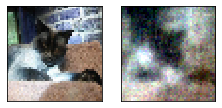

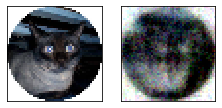

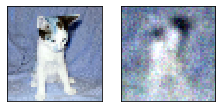

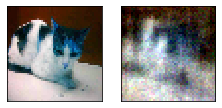

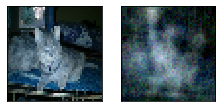

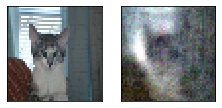

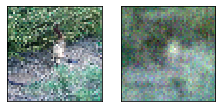

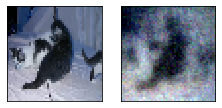

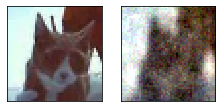

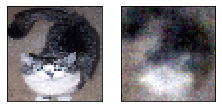

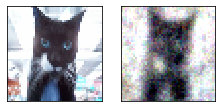

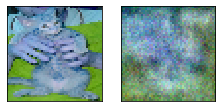

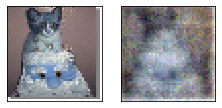

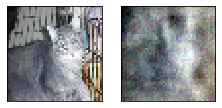

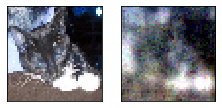

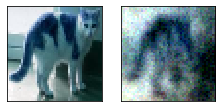

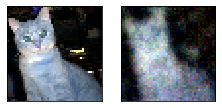

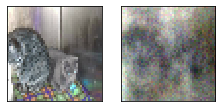

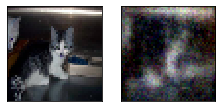

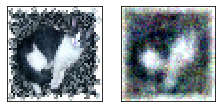

In [62]:
import matplotlib.pyplot as plt

valid_predictions = model.predict(x_valid)
for index in range(20):
    instance = x_valid[index]
    decoded_img = valid_predictions[index]


    plt.figure(figsize=(20, 4))
    subplot = plt.subplot(2, 10, 1)
    plt.imshow(instance)

    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

    subplot = plt.subplot(2, 10, 2)
    plt.imshow(decoded_img)

    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

In [53]:
'''
Adam(lr=0.0002) factor of 3 , 48x48 kittens
Epoch 35/40
922/922 [==============================] - 22s 23ms/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 36/40
922/922 [==============================] - 21s 22ms/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 37/40
922/922 [==============================] - 21s 23ms/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 38/40
922/922 [==============================] - 24s 26ms/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
'''

''